In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/IFR-SPCAI/Desktop/ms research/BlockTransaction_new.csv')

In [4]:
total_rows=len(df)
rows_to_keep=30000

new_df=df.head(rows_to_keep)
df=new_df

In [5]:
df.tail()

,from,to,value
29995,0xa1623430350c5df1b52b0b57483a5bb45d1796da,0xf2881e3e520bf84469fa00a56449d357fb1af54a,33000000000000000000
29996,0xc597a5d92f5dc1137d847db733cfe02c6d209f13,0x566e0aa7681c4028af41eaf57a41a8b9c09c644c,8720552270000001024
29997,0x87c5b5874a18b4306df8a752a6c8cc3e82dafc19,0xd79b4c6791784184e2755b2fc1659eaab0f80456,1798046617588413161
29998,0xbe750c24427887537fbc1e67ed096a59df3a4cc4,0x8c37447a7930187595ec51fea6f749c4f8a96cd4,150000000000000000000
29999,0xa70a9a7040d542c632d8e0be7c5513a8a5bbc752,0x32be343b94f860124dc4fee278fdcbd38c102d88,5126351190000000000


In [6]:
#giving nodes add rerlation 

G = nx.DiGraph()
G.add_nodes_from(df['from'])
G.add_nodes_from(df['to'])
 #Add edges to the graph for each transaction
for index, row in df.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['value'])

In [7]:
# Count the null values in df
df.isnull().sum()


from     0
to       0
value    0
dtype: int64

# Visualizing Relation

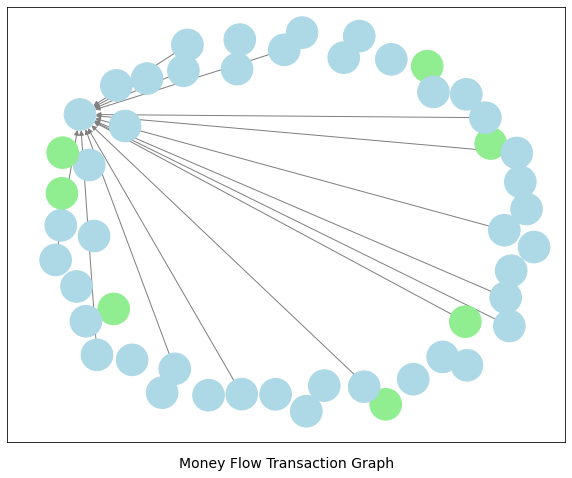

In [8]:


# Assuming you have a graph G with edges and a DataFrame df with 'from' and 'to' columns

# Extract the 'from' and 'to' nodes from the graph
from_nodes = set(df['from'])
to_nodes = set(df['to'])

# Define the number of nodes to visualize
num_nodes = 50
import random
# Get a subset of nodes to visualize
subset_nodes =random.sample(list(G.nodes()),num_nodes)

# Define node colors
node_colors = []
for node in subset_nodes:
    if node in from_nodes:
        node_colors.append('lightblue')  # Set 'from' node color
    elif node in to_nodes:
        node_colors.append('lightgreen')  # Set 'to' node color
    else:
        node_colors.append('lightgray')  # Set default color for other nodes

# Create a subgraph with only the subset of nodes
subgraph = G.subgraph(subset_nodes)

# Visualize the subgraph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=False, node_color=node_colors, node_size=1000, edge_color='gray', arrows=True)

# Customize the plot as desired (e.g., labels, title, axis limits, etc.)
#plt.title('Money Flow Transaction Graph ', loc='bottom')
plt.text(0.5, -0.05, 'Money Flow Transaction Graph',fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)

plt.axis('on')

# Show the plot
plt.show()


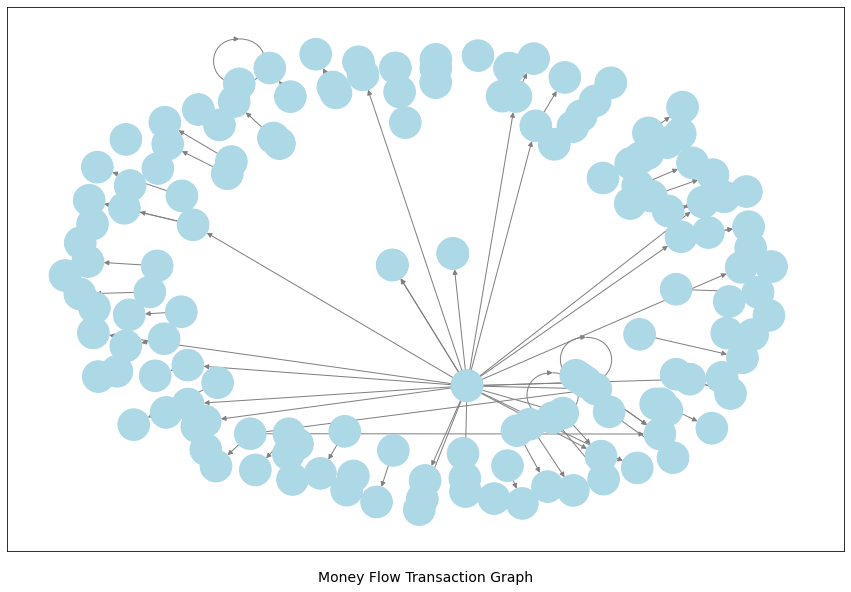

In [9]:


# Assuming you have a graph G with edges and a DataFrame df with 'from' and 'to' columns

# Extract the 'from' and 'to' nodes from the graph
from_nodes = set(df['from'])
to_nodes = set(df['to'])

# Define the number of nodes to visualize
num_nodes = 150
import random
# Get a subset of nodes to visualize
subset_nodes =list(G.nodes())[:num_nodes]

# Define node colors
node_colors = []
for node in subset_nodes:
    if node in from_nodes:
        node_colors.append('lightblue')  # Set 'from' node color
    elif node in to_nodes:
        node_colors.append('lightgreen')  # Set 'to' node color
    else:
        node_colors.append('lightgray')  # Set default color for other nodes

# Create a subgraph with only the subset of nodes
subgraph = G.subgraph(subset_nodes)

# Visualize the subgraph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=False, node_color=node_colors, node_size=1000, edge_color='gray', arrows=True)

# Customize the plot as desired (e.g., labels, title, axis limits, etc.)
plt.text(0.5, -0.05, 'Money Flow Transaction Graph',fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)

#plt.axis('off')

# Show the plot
plt.show()


# Detection of Cycles

In [10]:
# Detect cycles in the graph
cycles = list(nx.simple_cycles(G))
num_cycles = len(cycles)

print("Number of cycles:", num_cycles)
# Print the detected cycles


Number of cycles: 11740698


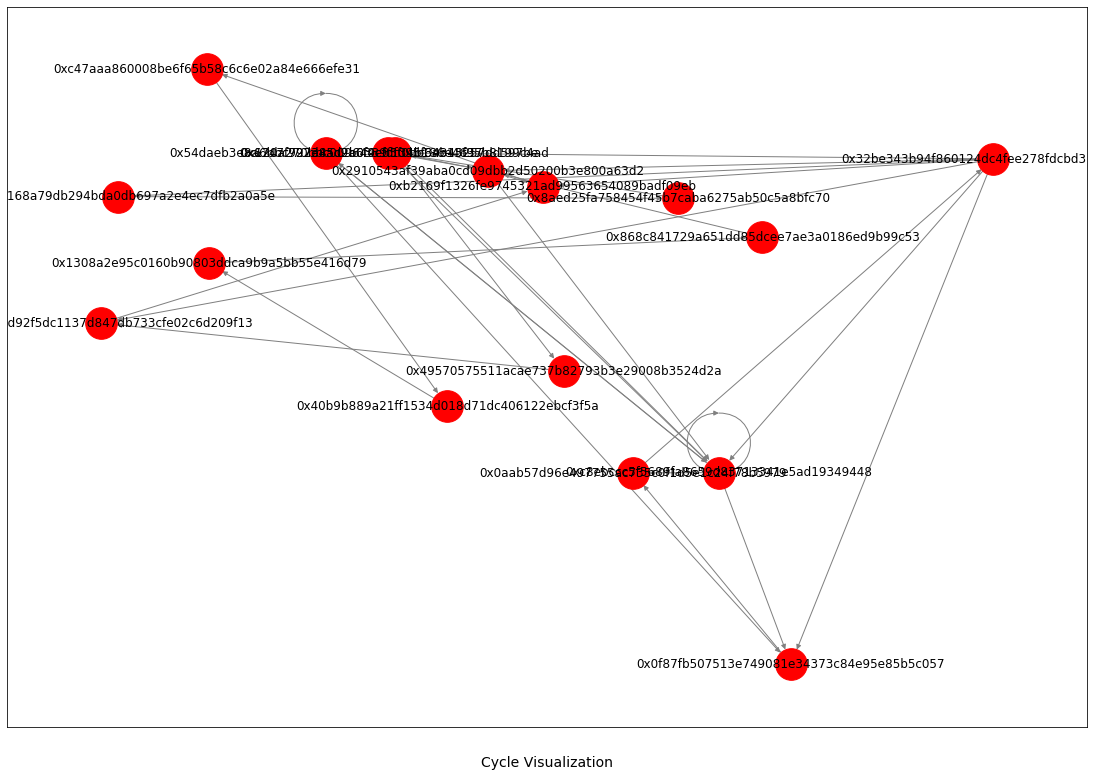

In [13]:
# Assuming 'cycles' is a list of cycles
chosen_cycle = cycles[100]  # Choose the first cycle from the list

# Create a subgraph containing only the nodes and edges from the chosen cycle
subgraph = G.subgraph(chosen_cycle)

# Plot the subgraph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgraph)  # Choose a layout algorithm
nx.draw(subgraph, pos, with_labels=True, node_color='red',node_size=1000,  arrows=True, edge_color='grey')
plt.text(0.5, -0.05, 'Cycle Visualization',fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.axis('on')
plt.show()


In [14]:
print(chosen_cycle)

['0x54daeb3e8a6bbc797e4ad2b0339f134b186e4637', '0x0f87fb507513e749081e34373c84e95e85b5c057', '0x0aab57d96e497755ac735c0f1d5e1c24f78b5979', '0x32be343b94f860124dc4fee278fdcbd38c102d88', '0x5947168a79db294bda0db697a2e4ec7dfb2a0a5e', '0x8aed25fa758454f45b7caba6275ab50c5a8bfc70', '0x120a270bbc009644e35f0bb6ab13f95b8199c4ad', '0x49570575511acae737b82793b3e29008b3524d2a', '0xc597a5d92f5dc1137d847db733cfe02c6d209f13', '0xb2169f1326fe9745321ad99563654089badf09eb', '0xc47aaa860008be6f65b58c6c6e02a84e666efe31', '0x40b9b889a21ff1534d018d71dc406122ebcf3f5a', '0x1308a2e95c0160b90803ddca9b9a5bb55e416d79', '0x868c841729a651dd85dcee7ae3a0186ed9b99c53', '0x2910543af39aba0cd09dbb2d50200b3e800a63d2', '0x6747f922385c9a6f9cfdf095f34345257dd597be', '0xc8ebccc5f5689fa8659d83713341e5ad19349448']


# Assigning label for Fraud and Normal

In [15]:


# Assuming you have a directed graph G

# Step 1: Detect Cycles

# Step 2: Label Nodes in the Cycle
positive_nodes = set()
for cycle in cycles:
    positive_nodes.update(cycle)

# Step 3: Label Remaining Nodes
negative_nodes = set(G.nodes()) - positive_nodes

# Assign labels to nodes
labels = {}
for node in positive_nodes:
    labels[node] = 1  # Positive example
for node in negative_nodes:
    labels[node] = 0  # Negative example



In [16]:
positive_count = sum(label == 1 for label in labels.values())
negative_count = sum(label == 0 for label in labels.values())
print(positive_count)
print(negative_count) 

3144
4404


# Maping Label on nodes

# Adding Label Column into Dataframe & Assign Fraud Label to Users Relating with Cyclic Fraud

In [17]:
# Add a new column 'label' and initialize with NaN values
df['label'] = float('nan')

# Assign labels from the 'labels_dict' to the corresponding rows
for index, row in df.iterrows():
    sender_label = labels.get(row['from'])
    receiver_label = labels.get(row['to'])
    
    if sender_label is not None and receiver_label is not None:
        # Determine which label to assign based on your specific rule or priority
        # For example, if sender label is 1 and receiver label is 0, assign 1 as the label
        if sender_label == 1 and receiver_label == 0:
            df.at[index, 'label'] = sender_label
        elif sender_label == 0 and receiver_label == 1:
            df.at[index, 'label'] = receiver_label
        else:
            # Handle the case when both labels are the same or any other specific case
            df.at[index, 'label'] = sender_label  # Assign sender label by default
    elif sender_label is not None:
        df.at[index, 'label'] = sender_label  # Assign label for sender
    elif receiver_label is not None:
        df.at[index, 'label'] = receiver_label  # Assign label for receiver


In [18]:


# Verify the updated DataFrame
df.head()


,from,to,value,label
0,0xa1e4380a3b1f749673e270229993ee55f35663b4,0x5df9b87991262f6ba471f09758cde1c0fc1de734,31337,0.0
1,0xbd08e0cddec097db7901ea819a3d1fd9de8951a2,0x5c12a8e43faf884521c2454f39560e6c265a68c8,19900000000000000000,0.0
2,0x63ac545c991243fa18aec41d4f6f598e555015dc,0xc93f2250589a6563f5359051c1ea25746549f0d8,599989500000000000000,0.0
3,0x037dd056e7fdbd641db5b6bea2a8780a83fae180,0x7e7ec15a5944e978257ddae0008c2f2ece0a6090,100000000000000000000,0.0
4,0x3f2f381491797cc5c0d48296c14fd0cd00cdfa2d,0x4bd5f0ee173c81d42765154865ee69361b6ad189,803989500000000000000,1.0


In [19]:

df['label'] = df['label'].astype(int)


In [20]:
label_counts=df['label'].value_counts()

counts_1=label_counts[1]
counts_0=label_counts[0]
print("one",counts_1)
print(counts_0)

one 19801
10199


# Again creating Relation Along With Labels

In [21]:
from collections import defaultdict

# Create a dictionary mapping nodes to labels
labels_dict = defaultdict(set)

for index, row in df.iterrows():
    labels_dict[row['from']].add(row['label'])
    labels_dict[row['to']].add(row['label'])

# Assign a label of 1 to nodes that appear in both columns with label values 1 and 0
for node, labels in labels_dict.items():
    if 1 in labels and 0 in labels:
        labels_dict[node] = 1
    else:
        labels_dict[node] = labels.pop()  # Assign the label of the node

# Add nodes to the graph with labels
G = nx.DiGraph()
for node, label in labels_dict.items():
    G.add_node(node, label=label)

# Add edges to the graph for each transaction
for index, row in df.iterrows():
    G.add_edge(row['from'], row['to'], transaction=row['value'])


In [32]:
# Create a dictionary mapping nodes to labels
labels_dict = {}
for index, row in df.iterrows():
    labels_dict[row['from']] = row['label']
    labels_dict[row['to']] = row['label']

# Add nodes to the graph with labels
G = nx.DiGraph()
for node, label in labels_dict.items():
    G.add_node(node, label=label)

# Add edges to the graph for each transaction
for index, row in df.iterrows():
    G.add_edge(row['from'], row['to'], transaction=row['value'])



# Visualizing Labeled Graph

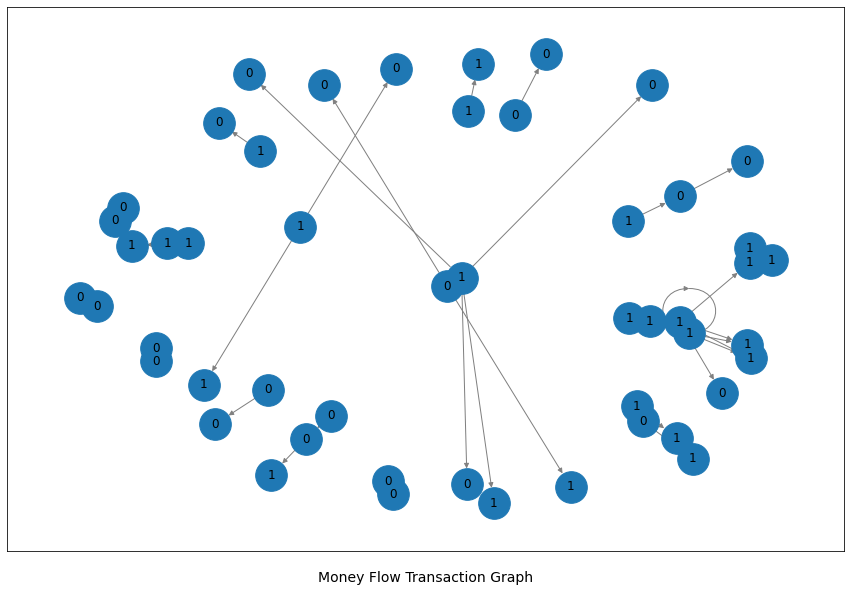

In [22]:


# Assuming you have a graph G with node attributes 'address' and 'label', and edge attribute 'transaction_label'

# Define the number of nodes to visualize
num_nodes = 50

# Get a subset of nodes to visualize
subset_nodes = list(G.nodes())[:num_nodes]

# Create a list of colors for nodes based on their labels

# Create a list of labels for nodes based on their addresses
node_labels = {node: G.nodes[node]['label'] for node in subset_nodes}

# Create a subgraph with only the subset of nodes
subgraph = G.subgraph(subset_nodes)

# Plot the subgraph with node colors, labels, and edge labels
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, labels=node_labels , node_size=1000, edge_color='gray', arrows=True)
plt.text(0.5, -0.05, 'Money Flow Transaction Graph',fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
# Show the plot
plt.show()


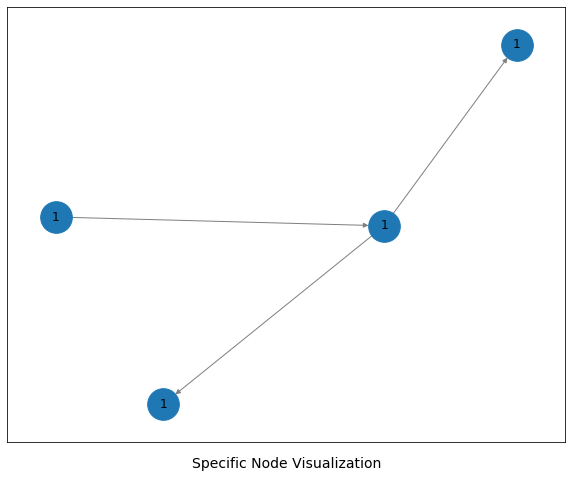

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

# Choose the node to visualize
node_id = '0x5947168a79db294bda0db697a2e4ec7dfb2a0a5e'

# Create a subgraph containing the edges and nodes related to the chosen node
subgraph = nx.DiGraph()

subgraph.add_edges_from([(from_node, to_node) for from_node, to_node in G.edges if from_node == node_id or to_node == node_id])
subgraph.add_nodes_from([node for node in subgraph if node != node_id])


plt.figure(figsize=(10, 8))
# Draw the graph with node labels and edge labels
pos = nx.spring_layout(subgraph)
node_labels = {node: G.nodes[node]['label'] for node in subgraph.nodes()}
#edge_labels = nx.get_edge_attributes(subgraph, 'transaction')
nx.draw_networkx(subgraph, pos, labels=node_labels, with_labels=True, node_size=1000, edge_color='gray', arrows=True)
#nx.draw_networkx_edges(subgraph, pos)
#nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)
plt.text(0.5, -0.05, 'Specific Node Visualization',fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


In [24]:
import networkx as nx

# Assuming you have a graph G with nodes and edges, and a DataFrame df with transaction values

# Compute relevant transaction features
transaction_features = df.groupby('from')['value'].agg(['sum', 'mean', 'max']).to_dict()

# Assign transaction features as attributes to the nodes in the graph
for node in G.nodes():
    if node in transaction_features:
        G.nodes[node]['total_transaction_amount'] = transaction_features[node]['sum']
        G.nodes[node]['average_transaction_amount'] = transaction_features[node]['mean']
        G.nodes[node]['maximum_transaction_amount'] = transaction_features[node]['max']
    else:
        G.nodes[node]['total_transaction_amount'] = 0
        G.nodes[node]['average_transaction_amount'] = 0
        G.nodes[node]['maximum_transaction_amount'] = 0


# Feature extraction From Graph

In [25]:
import community
# Compute Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Compute PageRank
pagerank = nx.pagerank(G)

# Apply Community Detection (Louvain)
partition= community.best_partition(G.to_undirected())

# Compute Clustering Coefficients
clustering_coefficients = nx.clustering(G)

# Compute Average Shortest Path Length
#average_shortest_path_length = nx.average_shortest_path_length(G)

In [26]:
import pandas as pd

features_df = pd.DataFrame()

features_df['degree_centrality'] = pd.Series(degree_centrality)
features_df['betweenness_centrality'] = pd.Series(betweenness_centrality)
features_df['pagerank'] = pd.Series(pagerank)
features_df['community'] = pd.Series(partition)
features_df['clustering_coefficient'] = pd.Series(clustering_coefficients)

# Create an empty DataFrame
features_df = pd.DataFrame()

# Iterate over the nodes in the graph
for node in G.nodes():
    # Extract the features for the node
    features = {
        'node': node,
        'degree_centrality': degree_centrality[node],
        'betweenness_centrality': betweenness_centrality[node],
        'pagerank': pagerank[node],
        'community': partition[node],
        'clustering_coefficient': clustering_coefficients[node],
        'label': None,
        'total_transaction_amount': 0,  # Placeholder for transaction feature
        'average_transaction_amount': 0,  # Placeholder for transaction feature
        'maximum_transaction_amount': 0  # Placeholder for transaction feature
    }
    
    labels = df.loc[(df['from'] == node) | (df['to'] == node), 'label'].values
    
    if labels.size > 0:
        if 1 in labels:
            features['label'] = 1
        elif 0 in labels:
            features['label'] = 0
        else:
            features['label'] = labels[0]
    
    # Calculate transaction features for the node
    node_transactions = df.loc[(df['from'] == node) | (df['to'] == node), 'value']
    if node_transactions.size > 0:
        features['total_transaction_amount'] = node_transactions.sum()
        features['average_transaction_amount'] = node_transactions.mean()
        features['maximum_transaction_amount'] = node_transactions.max()
    
    # Append the features to the DataFrame
    features_df = features_df.append(features, ignore_index=True)


C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(features, ignore_index=True)
C:\Users\IFR-SPCAI\AppData\Local\Temp\ipykernel_30860\2779440974.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

In [27]:
features_df.tail()


,node,degree_centrality,betweenness_centrality,pagerank,community,clustering_coefficient,label,total_transaction_amount,average_transaction_amount,maximum_transaction_amount
7543,0x03085885277ccf51036f9d8703e9c42b97409963,0.000133,0.0,0.000075,8,0.0,0,1000,1.000000e+03,1000
7544,0x5773dffdd4ad3114cab6efe3b9ca703fa450fe40,0.000133,0.0,0.000075,8,0.0,0,1000100010001000,2.500250e+14,1000
7545,0xfc8b1b712e10a89e87176215aed8352b323b7265,0.000265,0.0,0.000219,3,0.0,1,71170737800000000007115891070000000000,3.558537e+37,7117073780000000000
7546,0x051633080d07a557adde319261b074997f14692d,0.000133,0.0,0.000046,6,0.0,1,5799900000000000000000,5.799900e+21,5799900000000000000000
7547,0x566e0aa7681c4028af41eaf57a41a8b9c09c644c,0.000133,0.0,0.000294,3,0.0,1,8720552270000001024,8.720552e+18,8720552270000001024


In [28]:
label_counts=features_df['label'].value_counts()

counts_1=label_counts[1]
counts_0=label_counts[0]
print("one",counts_1)
print(counts_0)

one 5869
1679


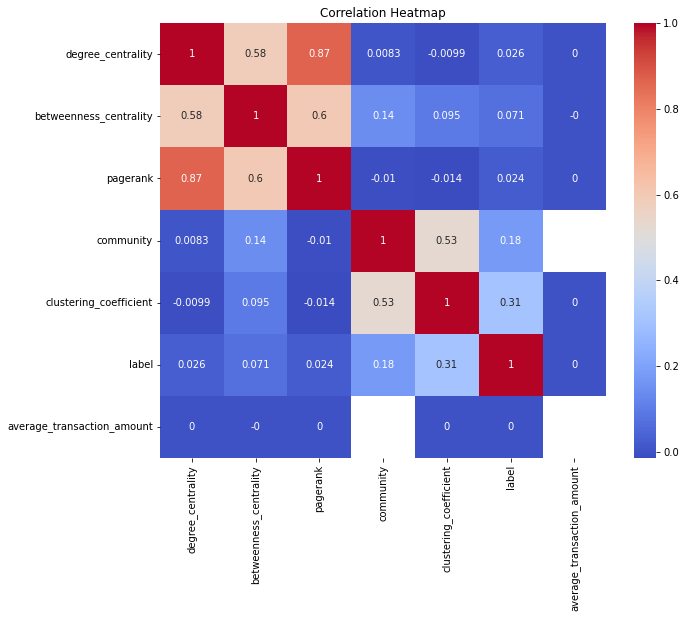

In [29]:


# Compute the correlation matrix
correlation_matrix = features_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [30]:
#split dataset in features and target variable
feature_cols = ['betweenness_centrality','clustering_coefficient','community','degree_centrality','pagerank']
X = features_df[feature_cols] # Features
y = features_df.label # Target variable

In [31]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [32]:
y_test

6463    1
3935    1
2560    1
6998    1
6911    1
       ..
3840    1
5887    1
152     1
5231    1
2083    1
Name: label, Length: 1510, dtype: int64

# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier 

In [211]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [212]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.8576158940397351
Precision: 0.8979591836734694
Recall: 0.9243697478991597
F1 Score: 0.9109730848861284


In [213]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 195,  125],
       [  90, 1100]], dtype=int64)

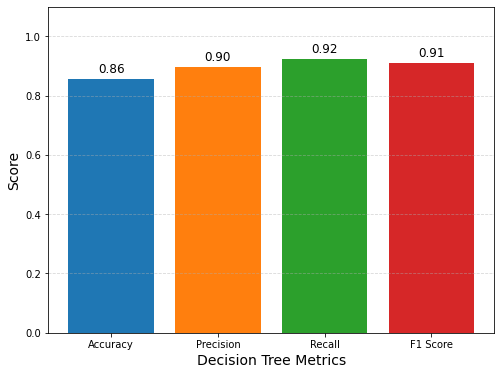

In [214]:
# Create a list of metric names and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the metrics as a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Decision Tree Metrics',fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.1)  # Set the y-axis limits between 0 and 1

plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()

# Random forest

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [202]:
y_pred = rf.predict(X_test)

In [203]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9483443708609272
Precision: 0.9719864176570459
Recall: 0.9621848739495799
F1 Score: 0.967060810810811


In [204]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 287,   33],
       [  45, 1145]], dtype=int64)

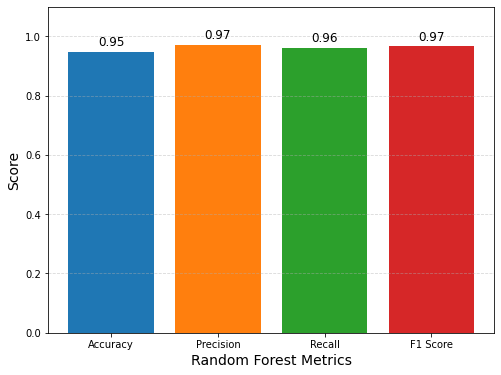

In [210]:
# Create a list of metric names and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the metrics as a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Random Forest Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.1)  # Set the y-axis limits between 0 and 1

plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()

# svm

In [215]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [216]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7920529801324503
Precision: 0.7955465587044535
Recall: 0.9907563025210084
F1 Score: 0.8824850299401198


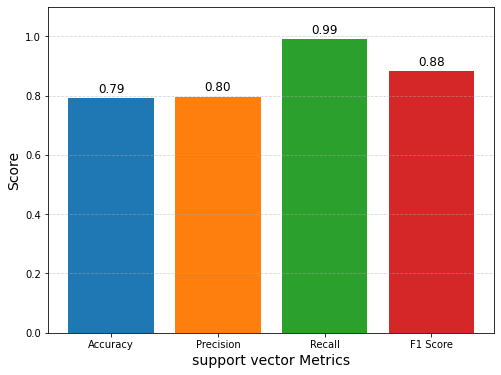

In [217]:
# Create a list of metric names and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the metrics as a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('support vector Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.1)  # Set the y-axis limits between 0 and 1

plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()

In [218]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  17,  303],
       [  11, 1179]], dtype=int64)

# Naive Bayes 

In [219]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [220]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.5258278145695364
Precision: 0.974
Recall: 0.4092436974789916
F1 Score: 0.5763313609467454


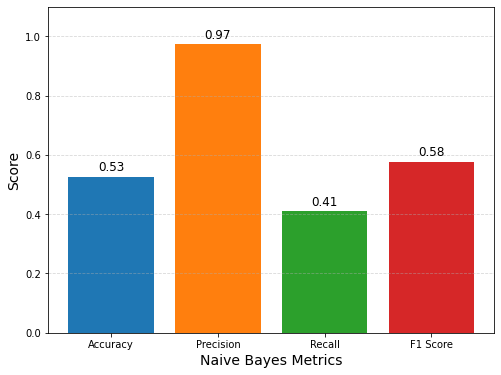

In [221]:
# Create a list of metric names and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the metrics as a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Naive Bayes Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.1)  # Set the y-axis limits between 0 and 1

plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()

In [222]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[307,  13],
       [703, 487]], dtype=int64)

# Neural Network

In [223]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense



# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 2.9648 - accuracy: 0.5459
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7749
Epoch 3/10
189/189 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7749
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7749
Epoch 5/10
189/189 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7749
Epoch 6/10
189/189 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7749
Epoch 7/10
189/189 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7749
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7749
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7749
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7854
T

In [224]:

# Assuming you have trained your neural network model and obtained predictions
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert predicted probabilities to binary labels (0 or 1)

# Convert true labels to binary
y_test_binary = y_test.astype(int)

# Calculate precision
precision = precision_score(y_test_binary, y_pred_binary)

# Calculate recall
recall = recall_score(y_test_binary, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_test_binary, y_pred_binary)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


48/48 [==============================] - 0s 894us/step
Precision: 0.8011126564673157
Recall: 0.9680672268907563
F1 Score: 0.8767123287671234


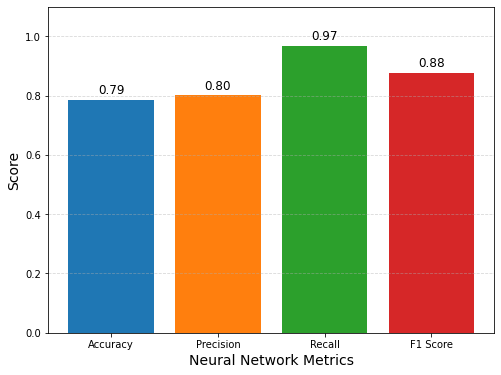

In [225]:
# Create a list of metric names and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the metrics as a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Neural Network Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.1)  # Set the y-axis limits between 0 and 1

plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()

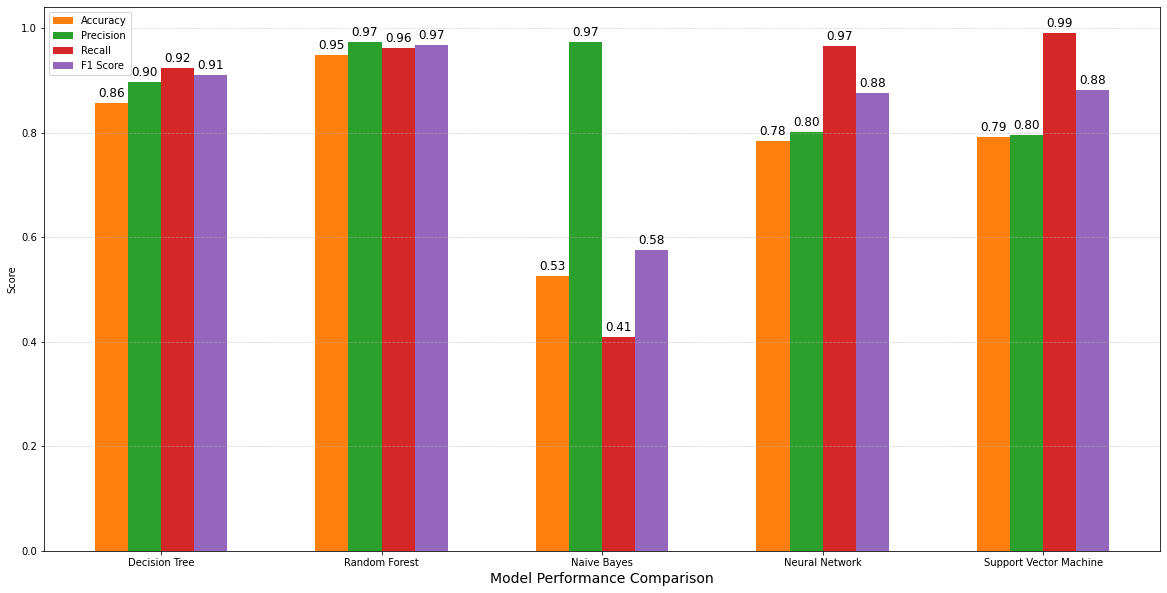

In [183]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
# Assuming you have computed the metrics for multiple models
model_names = ['Decision Tree', 'Random Forest','Naive Bayes', 'Neural Network','Support Vector Machine']  # Example model names
accuracy_scores = [ 0.8576158940397351,0.9496688741721855,0.5258278145695364, 0.7841059565544128, 0.7920529801324503]  # Example accuracy scores
precision_scores = [0.8979591836734694,0.9728353140916808, 0.974, 0.8008356545961003,0.7955465587044535]  # Example precision scores
recall_scores = [ 0.9243697478991597,0.9630252100840336,0.4092436974789916, 0.9663865546218487,0.9907563025210084]  # Example recall scores
f1_scores = [ 0.9109730848861284,0.9679054054054054, 0.5763313609467454,0.8758568164508759,0.8824850299401198]  # Example F1 scores

# Set the width of the bars
bar_width = 0.15

# Set the x positions of the bars
x = np.arange(len(model_names))
# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the metrics as grouped bars
plt.bar(x, accuracy_scores, width=bar_width)
plt.bar(x + bar_width, precision_scores, width=bar_width,color='#ff7f0e')
plt.bar(x + 2 * bar_width, recall_scores, width=bar_width, color='#1f77b4')
plt.bar(x + 3 * bar_width, f1_scores, width=bar_width, color='#d62728')

# Set the x-axis tick labels to be the model names
plt.xticks(x + 1.5 * bar_width, model_names)

# Add data labels to each bar
bars = plt.bar(x, accuracy_scores, width=bar_width, label='Accuracy')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

bars = plt.bar(x + bar_width, precision_scores, width=bar_width, label='Precision')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

bars = plt.bar(x + 2 * bar_width, recall_scores, width=bar_width, label='Recall')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

bars = plt.bar(x + 3 * bar_width, f1_scores, width=bar_width, label='F1 Score')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)
# Add labels, title, and legend
plt.xlabel('Model Performance Comparison',fontsize=14)
plt.ylabel('Score')
#plt.text(0.5, -0.15, 'Model Performance Comparison',fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Display the plot
plt.show()


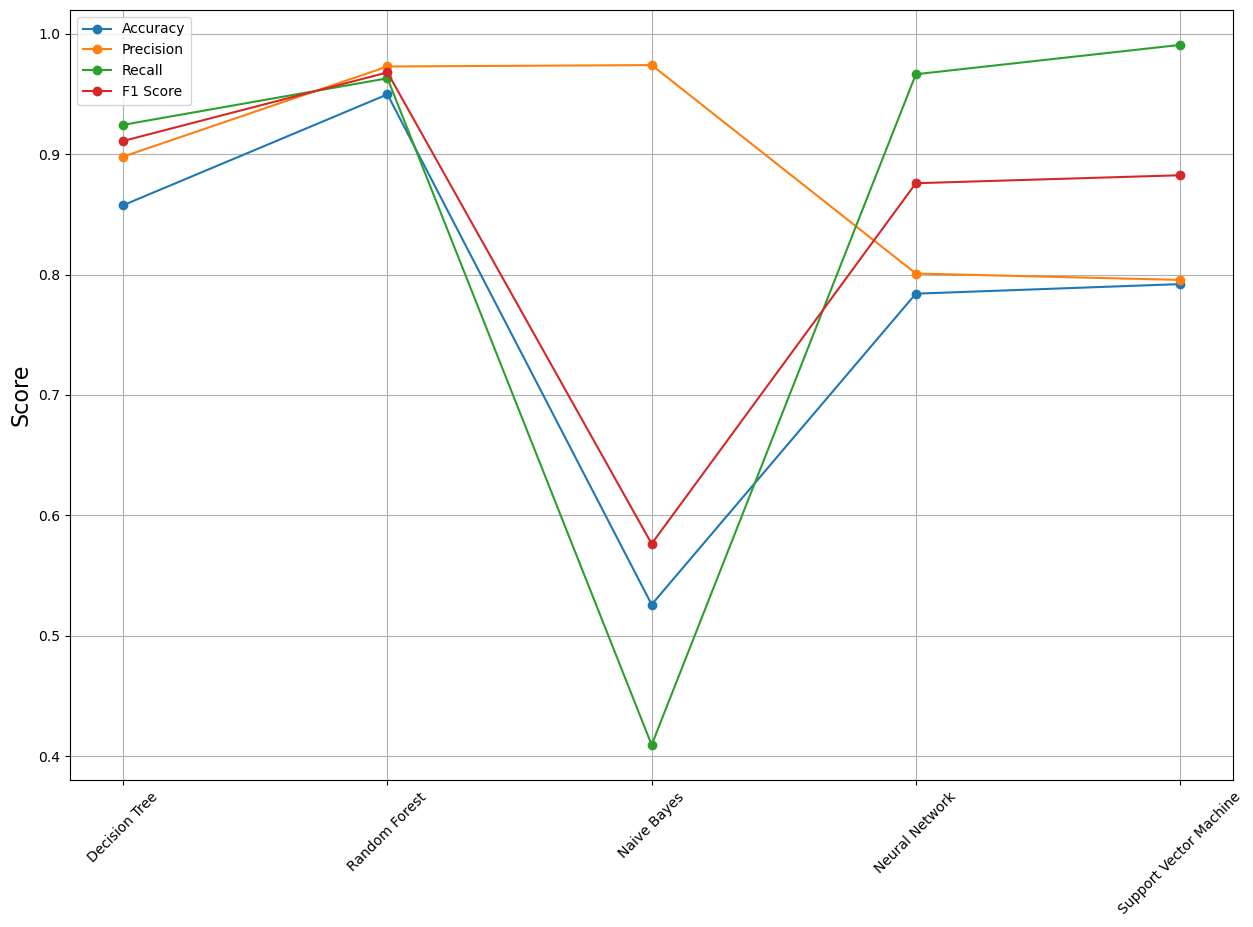

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
# Assuming you have computed the metrics for multiple models
model_names = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Network', 'Support Vector Machine']  # Example model names
accuracy_scores = [0.8576158940397351, 0.9496688741721855, 0.5258278145695364, 0.7841059565544128, 0.7920529801324503]  # Example accuracy scores
precision_scores = [0.8979591836734694, 0.9728353140916808, 0.974, 0.8008356545961003, 0.7955465587044535]  # Example precision scores
recall_scores = [0.9243697478991597, 0.9630252100840336, 0.4092436974789916, 0.9663865546218487, 0.9907563025210084]  # Example recall scores
f1_scores = [0.9109730848861284, 0.9679054054054054, 0.5763313609467454, 0.8758568164508759, 0.8824850299401198]  # Example F1 scores

# Set the x-axis values as the range of the number of models
x = np.arange(len(model_names))

# Plot the metrics as line charts
plt.plot(x, accuracy_scores, marker='o', label='Accuracy')
plt.plot(x, precision_scores, marker='o', label='Precision')
plt.plot(x, recall_scores, marker='o', label='Recall')
plt.plot(x, f1_scores, marker='o', label='F1 Score')

# Set the x-axis tick labels to be the model names
plt.xticks(x, model_names, rotation=45)



# Add labels, title, and legend
#plt.xlabel('Models Performance Comparison',fontsize=16)
plt.ylabel('Score',fontsize=16)
#plt.title('Model ')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
